<a href="https://colab.research.google.com/github/rajaram1988/Convolutional_neural_network/blob/master/Hackathon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A mutual fund is a professionally managed investment fund that pools money from many investors to purchase securities. These investors may be retail or institutional in nature. Mutual fund ratings is one of the most influential and prominent decision making factors that is used by investors in making a decision with regards to selecting a mutual fund.
Great Stone Rating is a star based ranking system. These ratings are based on the performance of a mutual fund with adjustments for risks and costs as compared to other funds in the same category. The rating ranges from 0 to 5.

In [0]:
#Importing necessary packages in Python 
%matplotlib inline 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

import numpy as np ; np.random.seed(sum(map(ord, "aesthetics")))
import pandas as pd

from sklearn.datasets import make_classification 
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

import seaborn as sns
sns.set_context('notebook') 
sns.set_style(style='darkgrid')

from pprint import pprint 



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
import glob

os.chdir('/content/drive/My Drive/Hackathon/')
path='.'

In [4]:
fund_rate = pd.read_csv('fund_specs.csv')
print (fund_rate.columns)
fund_rate.head(10)

Index(['investment_class', 'currency', 'total_assets', 'yield',
       'greatstone_rating', 'inception_date', 'tag', 'fund_size',
       'return_ytd'],
      dtype='object')


,investment_class,currency,total_assets,yield,greatstone_rating,inception_date,tag,fund_size,return_ytd
0,Value,USD,1.185000e+07,5.57,NaN,2015-02-02,67922,Large,20.19
1,Growth,USD,1.397000e+10,0.42,3.0,2012-05-30,134783,Large,16.79
2,Growth,USD,2.660000e+09,0.02,4.0,1987-08-23,61271,Large,17.13
3,Value,USD,1.957000e+10,2.71,3.0,2005-10-24,64412,Large,11.63
4,Blend,USD,2.847000e+07,2.44,0.0,2016-12-12,184058,Large,10.25
5,NaN,USD,3.322000e+07,0.73,3.0,2001-11-25,249560,NaN,10.69
6,Blend,USD,1.070000e+09,1.95,3.0,1996-12-15,202778,Large,2.43
7,Value,USD,6.243000e+07,1.42,NaN,2015-07-13,138257,Large,12.48
8,Value,USD,NaN,6.15,3.0,2006-06-11,102419,Large,-1.06
9,Growth,USD,6.987700e+08,1.80,5.0,2003-03-02,62027,Large,5.99


In [5]:
fund_rate.shape

(25000, 9)

In [0]:
#three_yr_ret = pd.read_csv('return_3year.csv', usecols = ['tag','3_years_return_category'])
#five_yr_ret = pd.read_csv('return_5year.csv', usecols = ['tag','5_years_return_category','category_r_squared_5years'])
#ten_yr_ret = pd.read_csv('return_10year.csv', usecols = ['fund_id','10_years_return_category','10years_category_r_squared'])
#ret_3and5 = pd.merge(three_yr_ret, five_yr_ret, on='tag')


In [0]:
#fund_ratio = pd.read_csv('fund_ratios.csv')
#bond_rating = pd.read_csv('bond_ratings.csv')
other_specs = pd.read_csv('other_specs.csv')
other_specs = other_specs.drop('greatstone_rating',axis=1)

In [0]:
df_merge_col1 = pd.merge(fund_rate, other_specs, on='tag')


In [8]:
df_merge_col1.shape

(25000, 50)

In [9]:
df_merge_col1.dtypes

investment_class                      object
currency                              object
total_assets                         float64
yield                                float64
greatstone_rating                    float64
inception_date                        object
tag                                    int64
fund_size                             object
return_ytd                           float64
2014_category_return                 float64
2012_return_category                 float64
years_up                             float64
2018_return_category                 float64
category_return_1year                float64
cash_percent_of_portfolio            float64
pc_ratio                              object
2011_return_category                 float64
ytd_return_fund                      float64
years_down                           float64
2014_return_fund                     float64
category_return_1month               float64
2013_return_fund                     float64
fund_retur

In [10]:
final = df_merge_col1
final.shape

(25000, 50)

In [11]:
final.fund_size.value_counts()

Large     14173
Medium     6009
Small      3338
Name: fund_size, dtype: int64

In [12]:
final.investment_class.value_counts()

Blend     10298
Growth     6671
Value      6551
Name: investment_class, dtype: int64

In [0]:
df_object = pd.get_dummies(data = final, columns = ['investment_class'],prefix='ic')
df_object1 = pd.get_dummies(data = df_object, columns = ['fund_size'],prefix='fc')

In [0]:
final = df_object1[['currency','total_assets','yield','inception_date','tag','return_ytd','2014_category_return','2012_return_category','years_up','2018_return_category','category_return_1year','cash_percent_of_portfolio','pc_ratio','2011_return_category','ytd_return_fund','years_down','2014_return_fund','category_return_1month','2013_return_fund','fund_return_3months','ytd_return_category','pb_ratio','2017_category_return','1_year_return_fund','pe_ratio','2015_return_fund','portfolio_convertable','3_months_return_category','portfolio_others','2016_return_fund','mmc','stock_percent_of_portfolio','2016_return_category','ps_ratio','2011_return_fund','2010_return_fund','fund_return_3years','2012_fund_return','2018_return_fund','2017_return_fund','category_ratio_net_annual_expense','category_return_2015','1_month_fund_return','bond_percentage_of_porfolio','portfolio_preferred','2010_return_category','2013_category_return','ic_Blend','ic_Growth','ic_Value','fc_Small','fc_Large','fc_Medium','greatstone_rating']]

In [0]:
final['mmc']  = pd.to_numeric(final['mmc'], errors='coerce')
final['ps_ratio'] = pd.to_numeric(final['ps_ratio'], errors='coerce')
final['pc_ratio'] = pd.to_numeric(final['pc_ratio'], errors='coerce')
final['pe_ratio'] = pd.to_numeric(final['pe_ratio'], errors='coerce')

In [16]:
print(final.isna().sum())

currency                                 0
total_assets                           119
yield                                  127
inception_date                           0
tag                                      0
return_ytd                             108
2014_category_return                  6183
2012_return_category                  9124
years_up                              1812
2018_return_category                   809
category_return_1year                  115
cash_percent_of_portfolio              114
pc_ratio                               129
2011_return_category                 10533
ytd_return_fund                        115
years_down                            1641
2014_return_fund                      7206
category_return_1month                 115
2013_return_fund                      8538
fund_return_3months                    115
ytd_return_category                    115
pb_ratio                               114
2017_category_return                  1428
1_year_retu

In [0]:
df = final.drop(['tag','currency','inception_date'], axis=1)

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['2011_return_category'] = imp_mean.fit_transform(df[['2011_return_category']])
df['2010_return_category'] = imp_mean.fit_transform(df[['2010_return_category']])
df['2012_return_category'] = imp_mean.fit_transform(df[['2012_return_category']])
df['2016_return_category'] = imp_mean.fit_transform(df[['2016_return_category']])
df['category_return_2015'] = imp_mean.fit_transform(df[['category_return_2015']])
df['2014_category_return'] = imp_mean.fit_transform(df[['2014_category_return']])
df['2013_category_return'] = imp_mean.fit_transform(df[['2013_category_return']])
df['2017_category_return'] = imp_mean.fit_transform(df[['2017_category_return']])
df['2011_return_fund'] = imp_mean.fit_transform(df[['2011_return_fund']])
df['2010_return_fund'] = imp_mean.fit_transform(df[['2010_return_fund']])
df['2013_return_fund'] = imp_mean.fit_transform(df[['2013_return_fund']])
df['2014_return_fund'] = imp_mean.fit_transform(df[['2014_return_fund']])
df['2015_return_fund'] = imp_mean.fit_transform(df[['2015_return_fund']])
df['2016_return_fund'] = imp_mean.fit_transform(df[['2016_return_fund']])
df['2017_return_fund'] = imp_mean.fit_transform(df[['2017_return_fund']])
df['2012_fund_return'] = imp_mean.fit_transform(df[['2012_fund_return']])
df['2012_fund_return'] = imp_mean.fit_transform(df[['2012_fund_return']])
df['mmc'] = imp_mean.fit_transform(df[['mmc']])
#df = df.replace(np.nan,0)

In [19]:
df.isna().sum()

total_assets                          119
yield                                 127
return_ytd                            108
2014_category_return                    0
2012_return_category                    0
years_up                             1812
2018_return_category                  809
category_return_1year                 115
cash_percent_of_portfolio             114
pc_ratio                              129
2011_return_category                    0
ytd_return_fund                       115
years_down                           1641
2014_return_fund                        0
category_return_1month                115
2013_return_fund                        0
fund_return_3months                   115
ytd_return_category                   115
pb_ratio                              114
2017_category_return                    0
1_year_return_fund                    115
pe_ratio                              132
2015_return_fund                        0
portfolio_convertable             

In [20]:
df = df.dropna()         
#df.dropna(,inplace=True)
df.shape

(16992, 51)

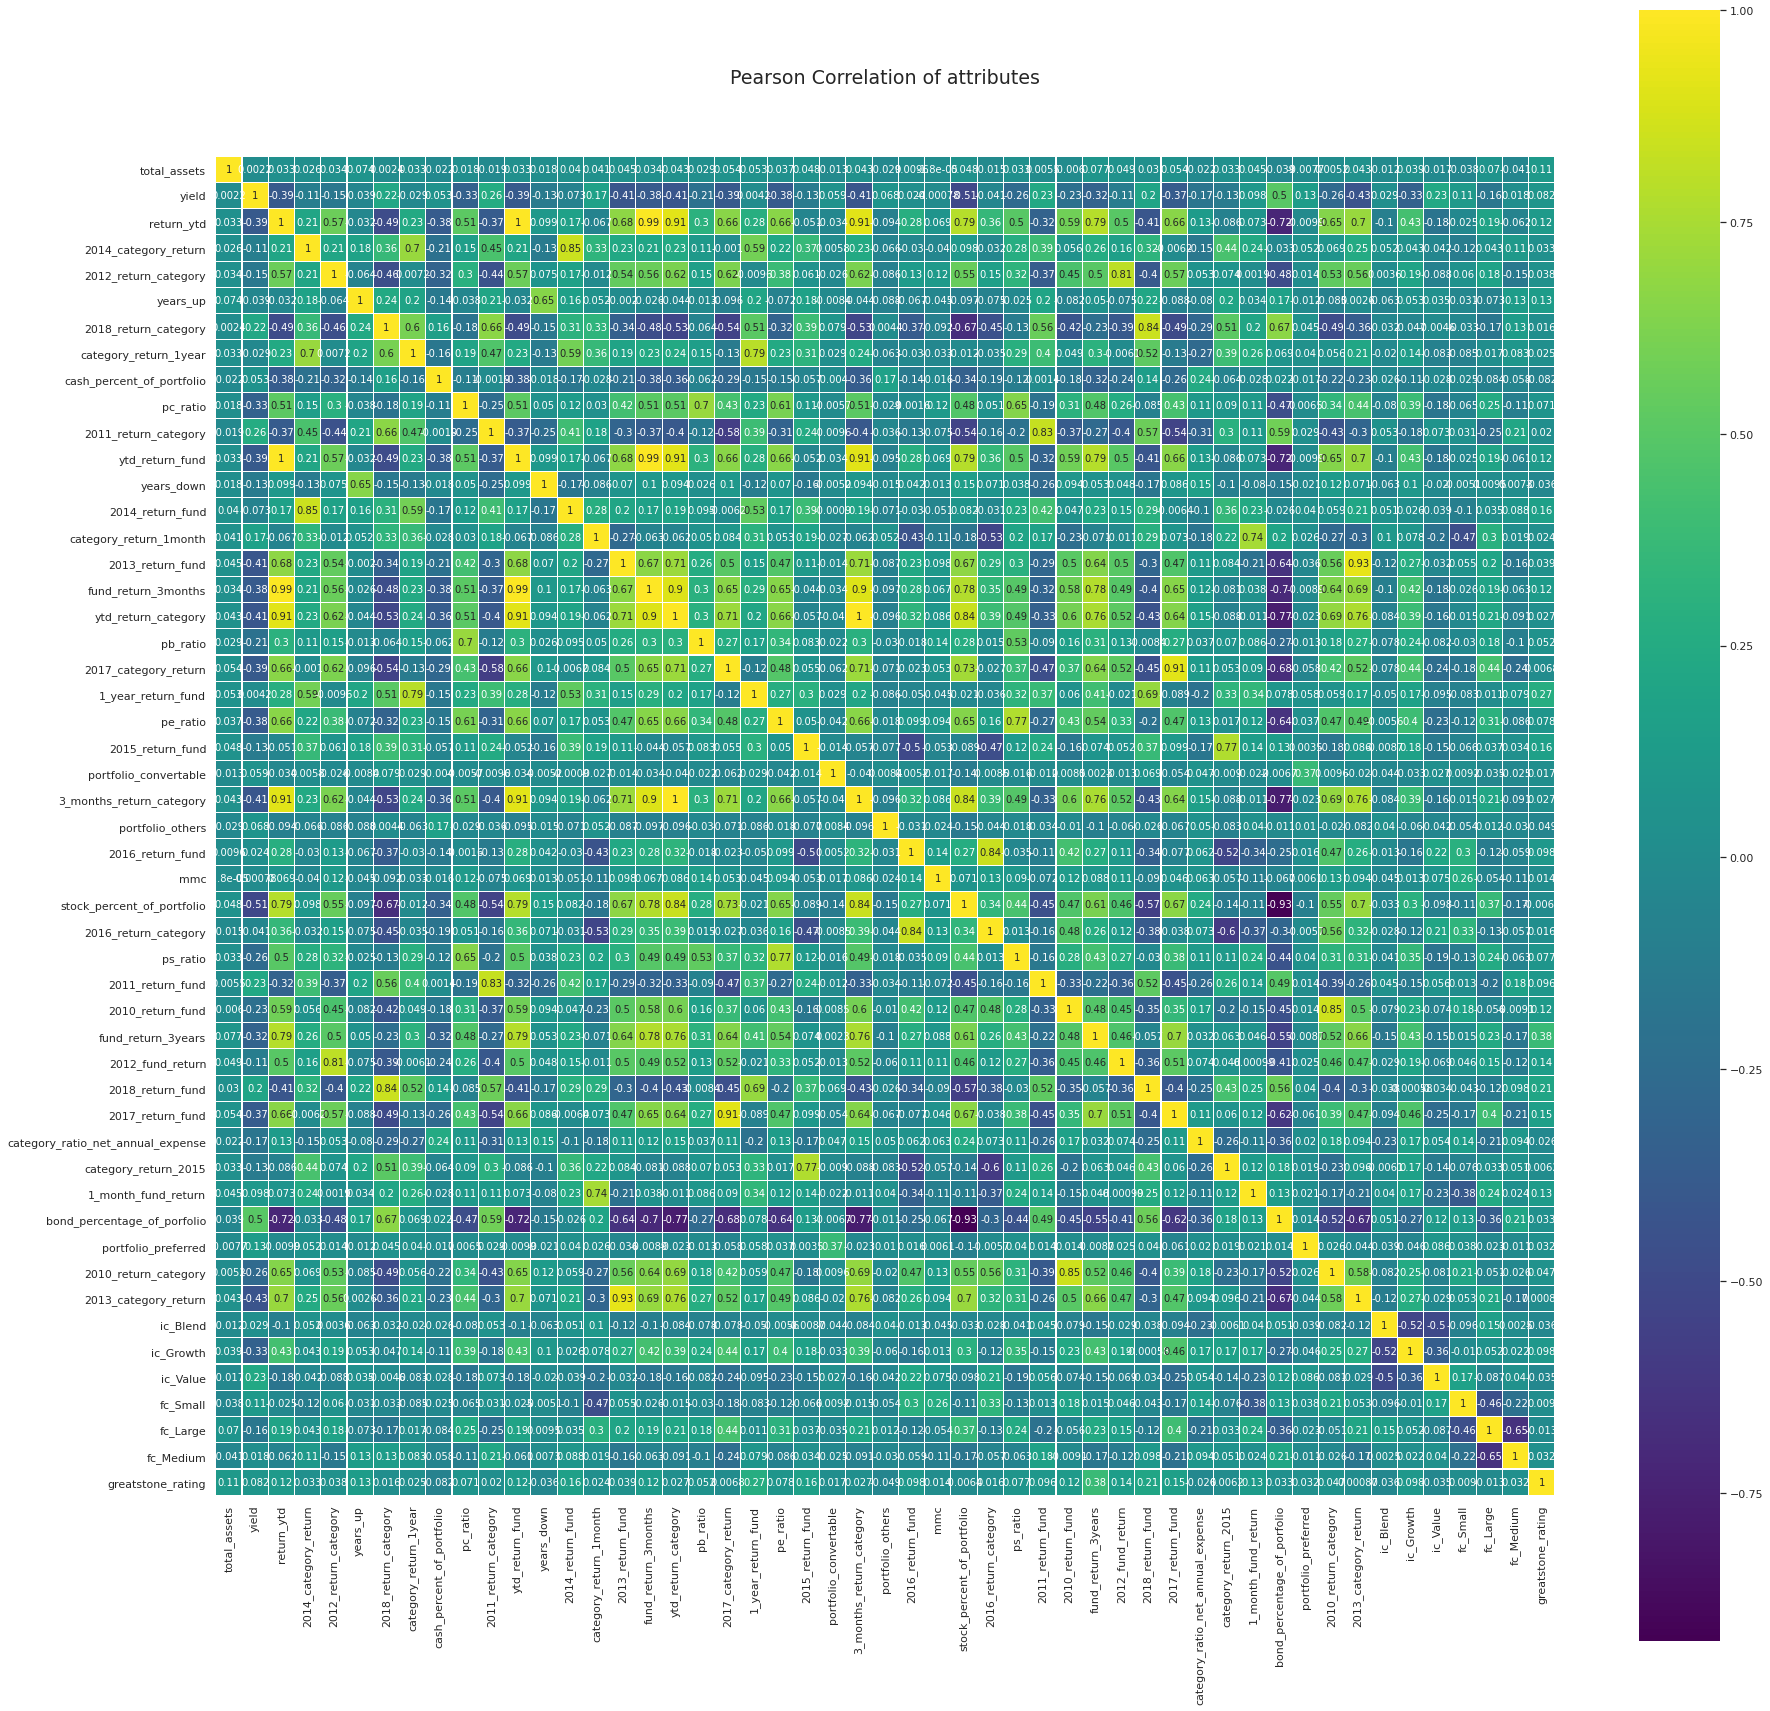

In [21]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df.corr(method='pearson'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [22]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.50722801 0.79401311 1.33440135 ... 0.8506916  0.55468952 0.04594295]
 [0.05413185 1.02235931 1.39753965 ... 0.8506916  0.55468952 0.91819173]
 [0.78517808 0.51326888 0.3761848  ... 0.8506916  0.55468952 0.04594295]
 ...
 [0.1290791  1.03377662 1.35111443 ... 1.17551413 0.55468952 0.04594295]
 [0.13941239 0.00621872 0.13105964 ... 0.8506916  0.55468952 1.6985546 ]
 [0.18180126 1.86622012 0.42975703 ... 1.17551413 1.80281032 1.6985546 ]]


In [23]:
threshold = 3
print(np.where(z > 3))

(array([    4,     4,    11, ..., 16987, 16987, 16991]), array([23, 41, 22, ..., 10, 31, 25]))


In [0]:
df_o = df[(z < 3).all(axis=1)]


In [25]:
df_o = df_o[df['years_up'] > 3]
df_o.shape

(9671, 51)

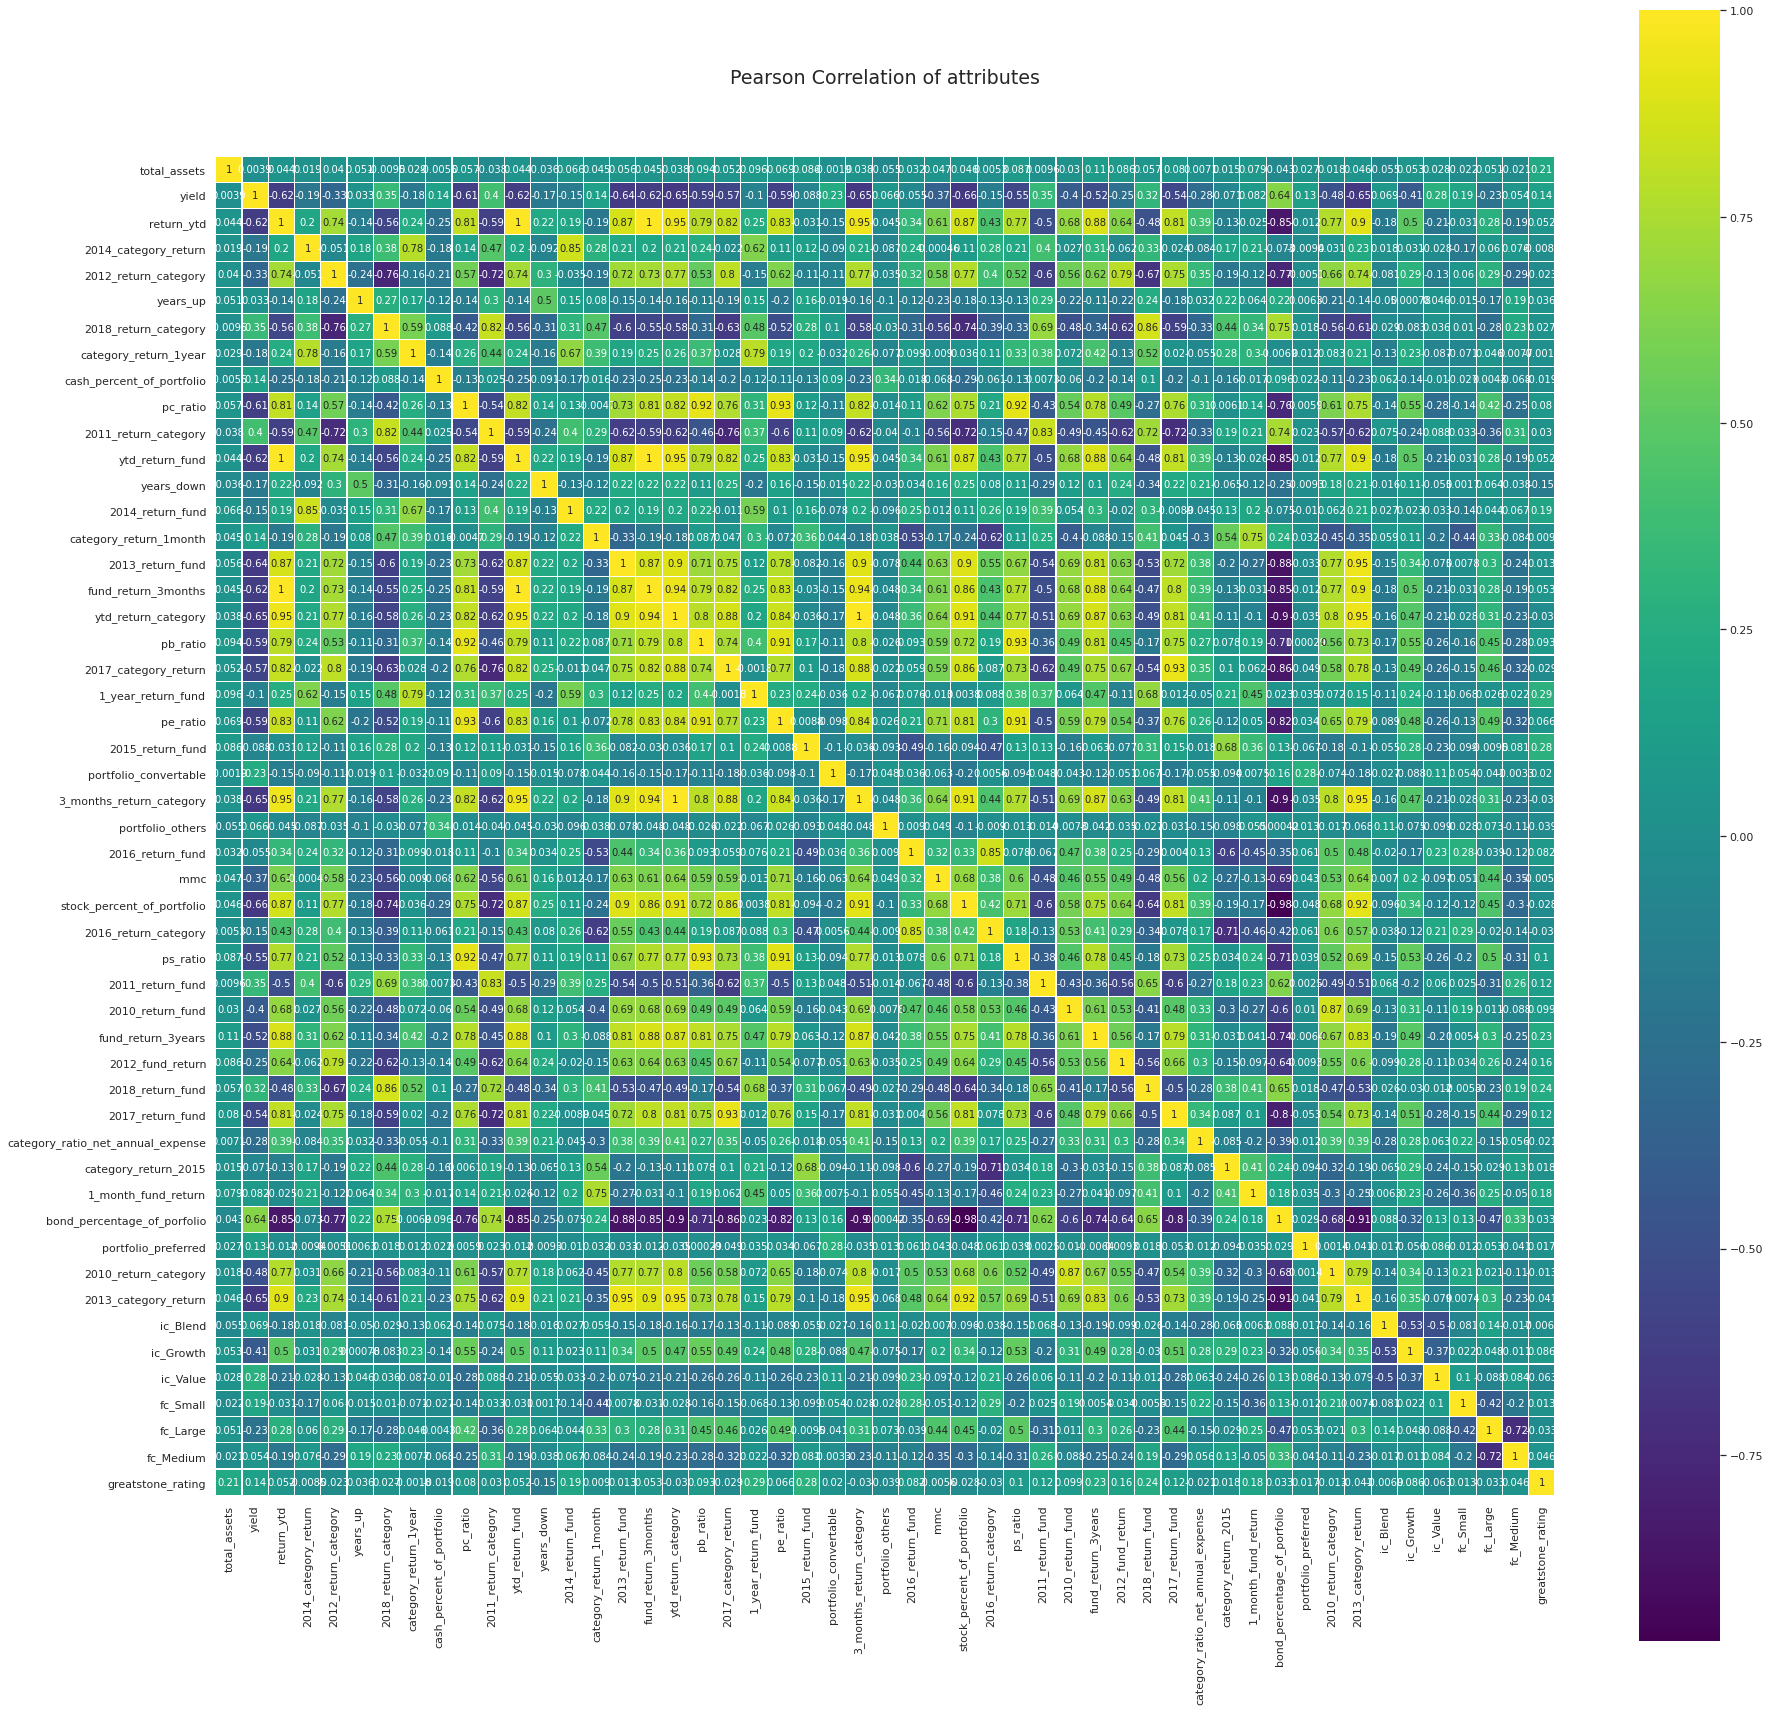

In [26]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df_o.corr(method='pearson'),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
X = df.loc[:,'total_assets':'fc_Medium']
y = df['greatstone_rating']

PCA

In [28]:
from scipy.stats import zscore

XScaled=X.apply(zscore)
XScaled.head()

,total_assets,yield,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,pc_ratio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio,2017_category_return,1_year_return_fund,pe_ratio,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc,stock_percent_of_portfolio,2016_return_category,ps_ratio,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,ic_Blend,ic_Growth,ic_Value,fc_Small,fc_Large,fc_Medium
1,0.507228,-0.794013,1.334401,0.920893,0.584942,-0.525757,0.863369,1.568550,-0.563952,1.418869,-0.002068,1.334344,-1.022670,1.403418,1.017334,1.262364,1.333107,1.273264,1.175595,1.307102,1.544894,0.711614,1.303603,-0.120158,1.273264,-0.240241,-0.740908,-0.017493,0.927120,-0.623342,1.410481,-0.012328,-0.007248,1.356689,-0.012148,0.678135,1.016921,0.165460,1.224479,0.839089,-0.768668,-0.154526,-0.013296,1.247851,-0.847817,1.628205,-0.586593,-0.391073,0.850692,-0.55469
2,-0.054132,-1.022359,1.397540,0.920893,0.584942,2.433342,0.863369,1.568550,-0.404544,1.421979,-0.103738,1.397489,0.698954,0.907440,1.017334,0.913063,1.395757,1.273264,1.210120,1.307102,2.733250,1.209154,0.974353,-0.120158,1.273264,-0.188633,-0.654114,-0.017493,0.860161,-0.623342,1.616500,-0.150279,0.543578,1.753526,0.460027,1.854507,0.960975,0.165460,1.224479,1.718485,-0.753376,-0.113942,0.389413,1.247851,-0.847817,1.628205,-0.586593,-0.391073,0.850692,-0.55469
3,0.785178,0.513269,0.376185,0.957670,0.425582,0.319700,-0.332565,0.345358,-0.058040,0.327297,0.188324,0.376025,-0.592264,1.105213,-0.332291,0.836133,0.382306,0.373242,0.115681,0.076077,0.751092,0.011204,0.701693,-0.120158,0.373242,-0.240241,0.920943,-0.017493,0.781881,1.088400,0.167268,0.206383,0.300570,-0.117278,0.845418,-0.077447,-0.648414,-0.024307,-0.356968,0.307787,-0.768668,-0.154526,0.072316,1.053611,-0.847817,-0.614173,1.704760,-0.391073,0.850692,-0.55469
4,-0.184745,0.359135,0.119918,-0.011316,-0.021238,-1.089395,-0.055866,0.088155,-0.019447,0.118934,-0.002068,0.119731,-1.022670,-0.010832,0.334391,-0.006705,0.128022,0.182141,0.043178,0.337394,0.124817,0.242407,0.007654,-0.102729,0.182141,-0.052578,-0.020033,-0.017493,0.144561,-0.023897,0.003874,-0.012328,-0.007248,-1.456359,-0.012148,-0.051339,0.189848,-1.763839,0.014524,0.197862,-0.110340,-0.144380,-0.013296,-0.007859,1.179499,-0.614173,-0.586593,-0.391073,0.850692,-0.55469
5,-0.184509,-0.617045,0.201626,0.285171,-0.329826,0.601519,0.859655,0.606489,-0.454883,-1.061271,-0.643455,0.201448,0.268548,0.083901,-0.657501,0.632374,0.209098,0.153373,-0.654225,-0.318523,0.608614,-1.428149,-0.870817,14.866899,0.153373,-0.240241,-0.259712,-0.530275,-1.328788,0.034452,-0.990696,0.465774,-0.212784,0.633390,-0.802398,0.836315,0.115253,0.671505,-0.278412,-0.272371,-0.768668,7.439687,0.599681,0.369114,-0.847817,-0.614173,-0.586593,-0.391073,-1.175514,-0.55469


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
cov_matrix = np.cov(XScaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00005885  0.002242    0.03311606 ... -0.03807867  0.06954879
  -0.04080761]
 [ 0.002242    1.00005885 -0.38547149 ...  0.11085164 -0.16079972
   0.01784705]
 [ 0.03311606 -0.38547149  1.00005885 ... -0.0247271   0.19041946
  -0.06163564]
 ...
 [-0.03807867  0.11085164 -0.0247271  ...  1.00005885 -0.45973873
  -0.21693679]
 [ 0.06954879 -0.16079972  0.19041946 ... -0.45973873  1.00005885
  -0.65208375]
 [-0.04080761  0.01784705 -0.06163564 ... -0.21693679 -0.65208375
   1.00005885]]


In [31]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.23407440e-02 -2.74170054e-02  1.77457197e-02 ...  5.77436165e-05
   3.03883662e-17 -2.25616913e-19]
 [ 1.25355204e-01  3.16019540e-02 -7.47301342e-02 ...  1.03478131e-04
  -4.14623431e-16 -2.01376620e-16]
 [-2.43376929e-01 -6.00075318e-02 -5.71031422e-02 ... -6.96913518e-01
   9.07526438e-14  1.86064647e-13]
 ...
 [ 2.44286133e-03  1.07387968e-01 -2.57624732e-01 ...  1.75063669e-04
   3.13043462e-01  3.61370189e-02]
 [-7.78090743e-02 -5.68028021e-02  2.71985301e-01 ...  5.32193081e-05
   4.55480057e-01  5.25795725e-02]
 [ 4.69762749e-02 -3.78475685e-02 -1.14257459e-01 ... -2.75682015e-04
   3.91472476e-01  4.51906843e-02]]

 Eigen Values 
%s [ 1.42111628e+01  6.38881517e+00  3.70618495e+00  2.18631885e+00
  2.02034550e+00  1.78854504e+00  1.63338363e+00  1.58451413e+00
  1.39309148e+00  1.37423972e+00  1.23425431e+00  1.14947961e+00
  9.90084602e-01  9.29270429e-01  8.65670781e-01  7.79442582e-01
  7.01806403e-01  6.88469934e-01  6.12545970e-01  5.49418436e-01
  

In [32]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.42065291  41.19753127  48.60946495  52.98184531  57.02229851
  60.59917807  63.86575308  67.03459485  69.82061383  72.56893153
  75.03729487  77.33611879  79.31617146  81.17460294  82.90584261
  84.46463604  85.86816624  87.24502507  88.47004492  89.56881712
  90.61721447  91.60844395  92.4860343   93.31265305  94.09346412
  94.73179821  95.31451841  95.85025101  96.34461027  96.80133468
  97.18906413  97.550466    97.87174489  98.18691818  98.47452949
  98.72979754  98.9515102   99.16374487  99.36871584  99.52462495
  99.67479259  99.78097289  99.86523283  99.93457348  99.97692396
  99.98998197  99.99950991 100.         100.         100.        ]


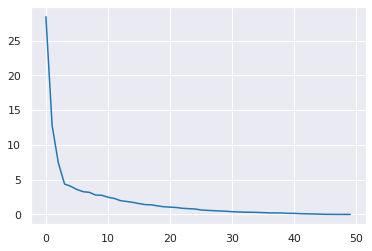

In [33]:
plt.plot(var_exp)

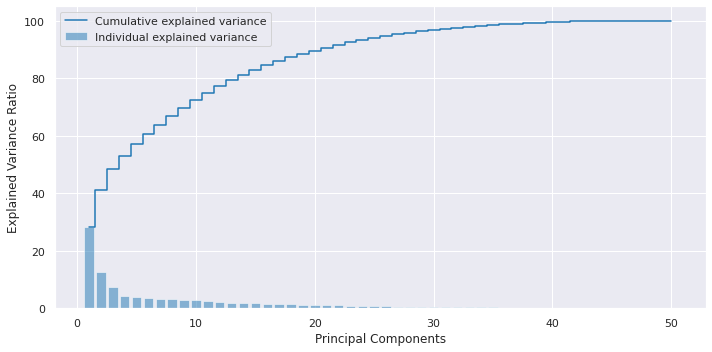

In [34]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [35]:
pca3 = PCA(n_components=25)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[-1.23407440e-02  1.25355204e-01 -2.43376929e-01 ...  2.44286133e-03
  -7.78090743e-02  4.69762749e-02]
 [-2.74170054e-02  3.16019539e-02 -6.00075317e-02 ...  1.07387968e-01
  -5.68028023e-02 -3.78475689e-02]
 [ 1.77457198e-02 -7.47301356e-02 -5.71031385e-02 ... -2.57624744e-01
   2.71985298e-01 -1.14257468e-01]
 ...
 [-2.02766327e-02  2.23711981e-01 -1.24717299e-01 ... -2.28892490e-01
   2.17762799e-01 -2.88974148e-02]
 [ 1.94563025e-02  3.90211445e-01 -8.52189626e-02 ... -2.98258254e-04
  -2.08429409e-02  6.19881663e-03]
 [-4.71865909e-02  3.48486976e-01  6.10459922e-03 ... -9.49395472e-02
  -6.79561402e-03  3.78452726e-02]]
[0.28420653 0.12776878 0.07411934 0.0437238  0.04040453 0.0357688
 0.03266575 0.03168842 0.02786019 0.02748318 0.02468363 0.02298824
 0.01980053 0.01858431 0.0173124  0.01558793 0.01403529 0.01376859
 0.0122502  0.01098771 0.01048395 0.00991222 0.00877586 0.00826604
 0.00780789]


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size = 0.2, random_state = 1)

In [37]:
y_test

21011    4.0
19651    5.0
11038    4.0
12277    3.0
18169    3.0
        ... 
22123    4.0
9752     2.0
6352     1.0
13919    0.0
18852    4.0
Name: greatstone_rating, Length: 3399, dtype: float64

In [38]:
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

# converting y data into categorical (one-hot encoding)
label_X_country_encoder = preprocessing.LabelEncoder()
y_train = label_X_country_encoder.fit_transform(y_train)
y_train = to_categorical(y_train,6) 
y_train.shape

# converting y data into categorical (one-hot encoding)
label_X_country_encoder = preprocessing.LabelEncoder()
y_test = label_X_country_encoder.fit_transform(y_test)
y_test = to_categorical(y_test,6)

Using TensorFlow backend.


In [0]:
seed = 1
from keras.layers import BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten  
from keras.layers import ReLU
from keras.regularizers import l2
from keras.initializers import glorot_normal

In [0]:
from keras import regularizers
def mlp_model():
    model = Sequential()
    
    model.add(Dense(336,bias_regularizer=l2(0.001),kernel_regularizer=regularizers.l2(0.001),input_shape = (25, )))             
    model.add(Activation('relu'))
    model.add(Dense(84,bias_regularizer=l2(0.001)))        
    model.add(Activation('relu'))     
    model.add(Dense(84,bias_regularizer=l2(0.001)))        
    model.add(Activation('relu'))  
    model.add(Dense(84,bias_regularizer=l2(0.001)))        
    model.add(Activation('relu'))  
    model.add(Dense(6))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001,decay=1e-6)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [42]:
model = mlp_model()
history = model.fit(X_train, y_train,batch_size = 32, epochs = 100, verbose = 1,callbacks=[es,mc])


Epoch 1/100
13593/13593 [==============================] - 1s 73us/step - loss: 1.2467 - accuracy: 0.4827
Epoch 2/100
13593/13593 [==============================] - 1s 60us/step - loss: 1.0239 - accuracy: 0.5701
Epoch 3/100
13593/13593 [==============================] - 1s 58us/step - loss: 0.9626 - accuracy: 0.5974
Epoch 4/100
13593/13593 [==============================] - 1s 60us/step - loss: 0.9072 - accuracy: 0.6216
Epoch 5/100
13593/13593 [==============================] - 1s 62us/step - loss: 0.8742 - accuracy: 0.6377
Epoch 6/100
13593/13593 [==============================] - 1s 56us/step - loss: 0.8490 - accuracy: 0.6480
Epoch 7/100
13593/13593 [==============================] - 1s 55us/step - loss: 0.8186 - accuracy: 0.6640
Epoch 8/100
13593/13593 [==============================] - 1s 54us/step - loss: 0.8032 - accuracy: 0.6709
Epoch 9/100
13593/13593 [==============================] - 1s 55us/step - loss: 0.7756 - accuracy: 0.6839
Epoch 10/100
13593/13593 [====================

In [43]:
# Predicting the Test set results
y_pred = model.predict(X_test)
print(y_pred)

[[3.3455056e-13 1.2164116e-12 1.7611278e-07 4.5482256e-02 9.5445591e-01
  6.1673563e-05]
 [1.0511584e-09 2.1797890e-10 3.4610078e-14 2.5777527e-07 1.4663494e-01
  8.5336477e-01]
 [1.1306627e-09 4.8780126e-11 3.4292434e-06 6.7039061e-01 3.2960072e-01
  5.1686784e-06]
 ...
 [2.7747822e-06 9.8333824e-01 1.6658908e-02 4.4042171e-08 1.0809365e-10
  1.4905312e-17]
 [1.0000000e+00 9.6028572e-18 1.8474096e-16 9.5532728e-11 5.3299346e-13
  9.2532893e-31]
 [5.0091870e-07 3.0522745e-08 1.8465700e-05 1.3992449e-02 8.4479243e-01
  1.4119609e-01]]


In [44]:
# So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.
y_pred = (y_pred > 0.5)
print(y_pred)

[[False False False False  True False]
 [False False False False False  True]
 [False False False  True False False]
 ...
 [False  True False False False False]
 [ True False False False False False]
 [False False False False  True False]]


In [45]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 5, 3, ..., 1, 0, 4])

In [46]:
y_test = np.argmax(y_test, axis=1)
y_test

array([4, 5, 4, ..., 1, 0, 4])

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       100
           1       0.74      0.66      0.69       262
           2       0.71      0.73      0.72       784
           3       0.69      0.77      0.73      1197
           4       0.70      0.62      0.66       806
           5       0.75      0.58      0.65       250

    accuracy                           0.70      3399
   macro avg       0.72      0.71      0.71      3399
weighted avg       0.71      0.70      0.70      3399



In [0]:
    ;------import numpy as np
    from sklearn import linear_model, decomposition, datasets
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV, cross_val_score
    from sklearn.preprocessing import StandardScaler

In [0]:
    # Create an scaler object
    sc = StandardScaler()

    # Create a pca object
    pca = decomposition.PCA()

    # Create a logistic regression object with an L2 penalty
    logistic = linear_model.LogisticRegression()

    # Create a pipeline of three steps. First, standardize the data.
    # Second, tranform the data with PCA.
    # Third, train a logistic regression on the data.
    pipe = Pipeline(steps=[('sc', sc),
                           ('pca', pca),
                           ('logistic', logistic)])

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y)
y_enc

array([3, 4, 3, ..., 3, 1, 1])

In [0]:
X = X
y = y_enc

In [0]:
 # Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
    n_components = list(range(1,X.shape[1]+1,1))
    # Create a list of values of the regularization parameter
    C = np.logspace(-4, 4, 50)
    # Create a list of options for the regularization penalty
    penalty = ['l1', 'l2']
    # Create a dictionary of all the parameter options 
    # Note has you can access the parameters of steps of a pipeline by using '__’
    parameters = dict(pca__n_components=n_components,
                      logistic__C=C,
                      logistic__penalty=penalty)

In [0]:
# Conduct Parameter Optmization With Pipeline
    # Create a grid search object
    clf = GridSearchCV(pipe, parameters)

    # Fit the grid search
    clf.fit(X, y)
    # View The Best Parameters
    print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
    print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
    print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf.best_estimator_.get_params()['logistic'])

    # Use Cross Validation To Evaluate Model
    CV_Result = cross_val_score(clf, X, y, cv=4, n_jobs=-1)
    print(); print(CV_Result)
    print(); print(CV_Result.mean())
    print(); print(CV_Result.std())

In [0]:
# build a classifier
clf = RandomForestClassifier(n_estimators=50)

In [0]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [0]:
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

In [0]:
grid_search.best_params_

In [0]:
grid_search.cv_results_['mean_test_score']

In [0]:
grid_search.best_estimator_

In [0]:
x_val_scaled = scaler.fit_transform(X)
X_val = pd.DataFrame(x_val_scaled)

In [0]:
predict = model.predict(X_val)


In [0]:
predict

In [0]:
submission = pd.DataFrame({
                  "fund_id": fund_id, 
                  "greatstone_rating": predict})

In [0]:
submission.to_csv('submit_file.csv',index=False)

In [0]:
given_rating = df1['greatstone_rating']

In [0]:
subm_test = pd.DataFrame({
                  "fund_id": fund_id, "given_rating": given_rating,
                  "predicted_rating": predict})

In [0]:

subm_test['error perc'] = (abs(subm_test['predicted_rating']-subm_test['given_rating'])/subm_test['given_rating'])*100

In [0]:
error_rate = subm_test['error perc'].sum()/len(subm_test)

In [0]:
error_rate